<a href="https://colab.research.google.com/github/Seecougsy/FastAI-Image-Classifier/blob/main/lasagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Install The Dependancies*


1.   ! <-- indicates using the terminal
2.   pip <-- the package manager
3.   fastbook <-- ??
4.   Duck duck go is the image search







In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook


!pip install -Uqq fastai duckduckgo_search


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastbook import *
from fastai.vision.widgets import * #<-- UI element

In [ ]:
fastbook.setup_book() #<-- this is the fastai libraries etc

Mounted at /content/gdrive


# *Search The Web For Images*

Using duck duck go API

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import * #<-- think this is testing functions
from fastdownload import download_url

In [ ]:
search_images_ddg #<-- creates an object
ims = search_images_ddg('lasagne') #<-- download 200 (defualt) lasagne images

In [ ]:
len(ims) #<-- check the length of the list

200

# *This code will check an image and show you the image. This is NOT an essential step.*

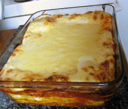

In [ ]:
dest = 'Image/lasagne.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

*Collect images for the model*

In [ ]:
search_types = 'lasagne','shepards pie','pavlova'
path = Path('meals') #<-- this is a parent folder

*The below loop creates a folder, for every string in var search_types*

In [ ]:
if not path.exists():
  path.mkdir()
  for o in search_types: #<-- this will create a sub folder for each term
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o}')
    download_images(dest, urls=results)

*Here is the folder created*

In [ ]:
fns = get_image_files(path)
fns

(#540) [Path('meals/pavlova/50f03225-334b-4dae-a691-6891ec6ff46f.jpg'),Path('meals/pavlova/de5fe8ad-74f8-4521-844d-64728c725adc.jpg'),Path('meals/pavlova/a5bae4be-095b-4f3b-b75c-0b79b62183f4.jpeg'),Path('meals/pavlova/af39f2c3-a2ce-406f-9743-56aa5799be17.jpg'),Path('meals/pavlova/0aca6071-528a-4f8a-a65d-e36bccfc2633.jpg'),Path('meals/pavlova/bf8009a1-88c9-42e1-a314-a1c307d7e43e.jpg'),Path('meals/pavlova/5b29fb73-c160-4e7a-be94-192608268140.jpg'),Path('meals/pavlova/af93dc21-69f5-4485-b2b5-a05c5347f91b.jpg'),Path('meals/pavlova/a9c2b68d-57ae-40c1-affc-7c171297355e.jpg'),Path('meals/pavlova/2ce1dfbe-227e-44b9-8855-d61e9242399d.jpg')...]

📍 *Delete the corrupt images from the deck using fast ai function*

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('meals/pavlova/4bdd5e03-534f-4443-b61f-f6b8f4307824.jpg'),Path('meals/pavlova/a80cda63-2310-4f42-9c67-9111bbfbe9b0.jpg'),Path('meals/pavlova/a4eae449-f802-4da7-8133-ef4f1a4cde8d.jpg'),Path('meals/lasagne/1c36b1a9-184b-44bd-8b1b-394fcfcd2846.jpg'),Path('meals/lasagne/54a9da5c-4827-4408-bd08-350f58e4f0c1.jpeg'),Path('meals/shepards pie/2ad10c14-b5e2-468b-9536-65155894267b.jpg'),Path('meals/shepards pie/0f989e2a-2321-48a2-9354-a2aec0011f53.jpg')]

📍 Remove the failed links

In [ ]:
failed.map(Path.unlink) #<-- this will fail if you do it twice.

(#7) [None,None,None,None,None,None,None]

💡 To inspect the content of every variable use *%debug* in next cell


#*Data Loader* :


Data loader is a class. Create an object of this class, then pass the file path to this object.

In [ ]:
meal = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #1 -> independant var, 2 -> dependant var
    get_items=get_image_files, #<- shows where images are as path
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #<- train test breakdown, seed ensures you get the same split each time
    get_y=parent_label, #<- get label from the name of parent folder
    item_tfms=Resize(128)) #<-- ensure size

*Now pass the path of files to the "meals" object (datablock obj)*

In [ ]:
dls = meal.dataloaders(path)

*check a batch of images*

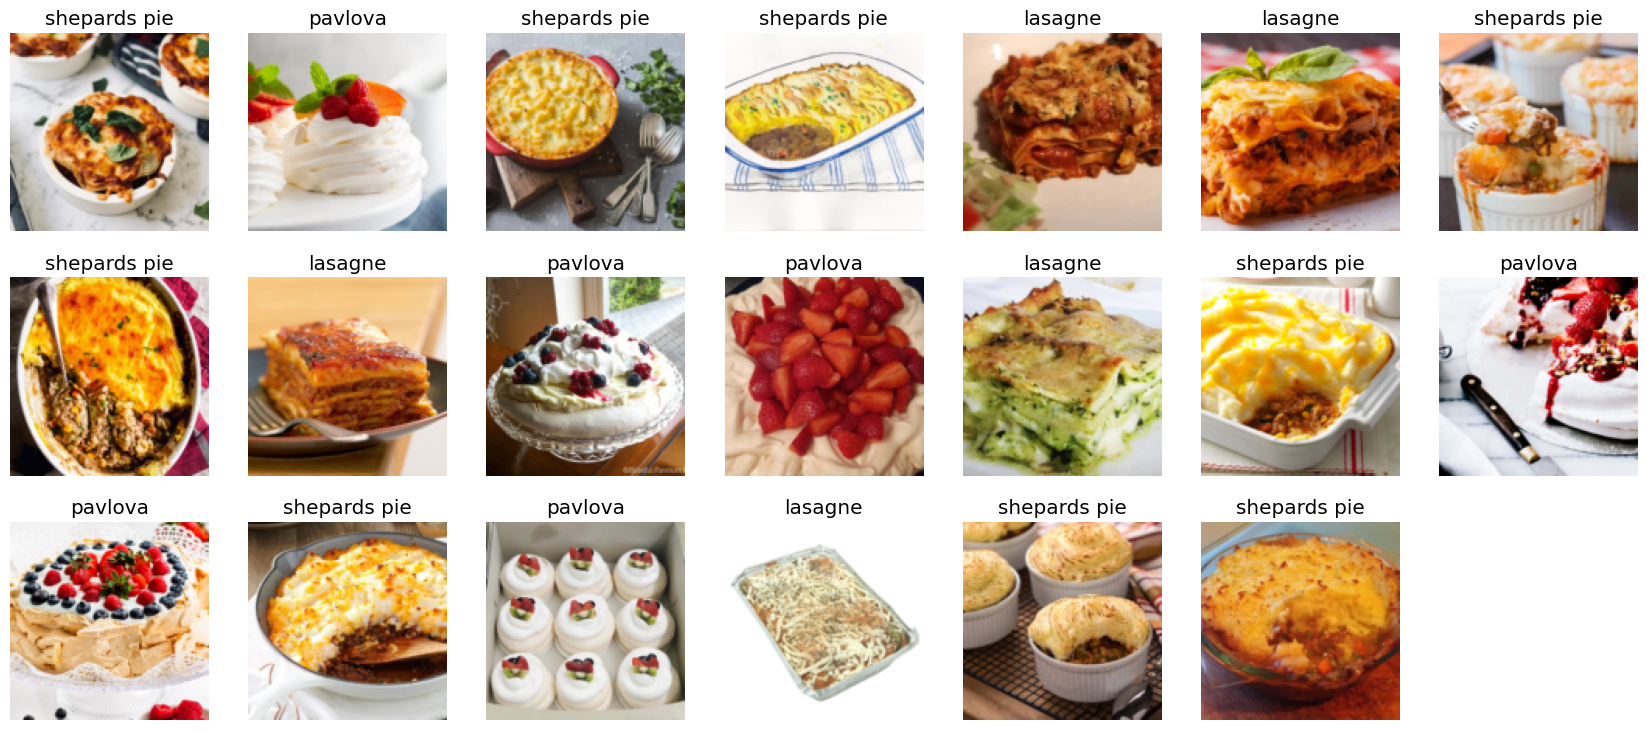

In [ ]:
dls.valid.show_batch(max_n=20, nrows =3)

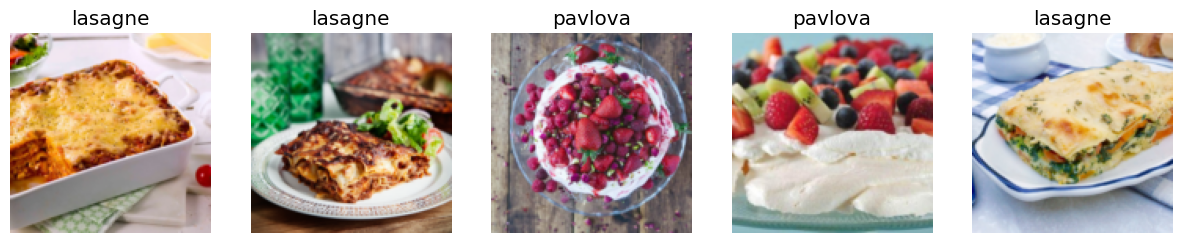

In [ ]:
dls.train.show_batch(max_n=5, nrows = 1)

Change image transform to assist in accuracy.

In [ ]:
# meal = meal.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = meal.dataloaders(path)

In [ ]:
# bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = bears.dataloaders(path)

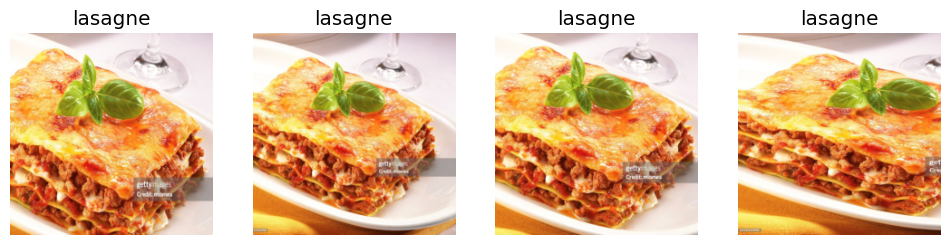

In [ ]:
# This is a great way to train the model to understand the differnt features
meal = meal.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
dls = meal.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True) #<-- unique 'True' means same image gets changes few times

Another data augmentation method, tone this example down though.

In [ ]:
# meal = meal.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = meal.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

#*Fine tune the FAST AI pretrained model*

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate) #<- the architechture
learn.fine_tune(4) #<- number of epochs/ cycles

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.444995,0.367097,0.160377,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.470461,0.212209,0.084906,00:09
1,0.318946,0.170532,0.066038,00:08
2,0.260847,0.166895,0.037736,00:08
3,0.215493,0.160521,0.037736,00:08


# *Confusion matrix*

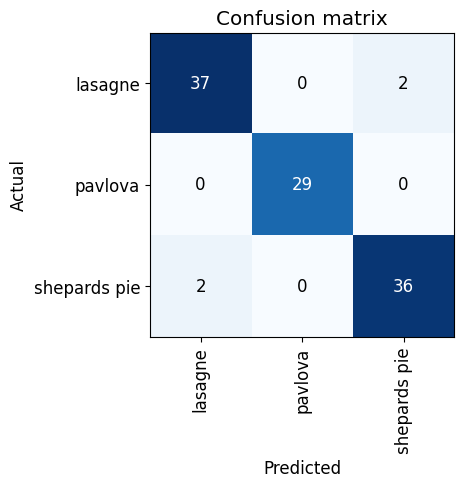

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

*Where did the model find difficult*

In [ ]:
interp.plot_top_losses(5, nrows=2)

NameError: name 'interp' is not defined

# *Clean the input data*


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

*Remove the Data*

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# *Export the model*

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

NameError: ignored

# Load the model

ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
learn_inf = load_learner('lasagne_export.pkl')


FileNotFoundError: ignored

In [ ]:
learn.export('lasagne_export.pkl')

NameError: ignored

# *To predict using the INFERENCE*

In [ ]:
learn_inf.predict('img')

NameError: ignored

In [ ]:
# MIGHT NEED THIS TO GET THE READBLE VERSION
learn_inf.dls.vocab

# *NOTEBOOK APP *

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
btn_upload = SimpleNamespace(data = ['test.jpg'])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
# #hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Upload your image'),
      btn_upload, btn_run, out_pl, lbl_pred])